In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from scipy.io import loadmat
from PIL import Image
%matplotlib inline
%matplotlib widget
from sklearn.model_selection import train_test_split

In [2]:
fashion_train_data = pd.read_csv("fashion-mnist_train.csv")
display(fashion_train_data)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [3]:
image_data = fashion_train_data.drop(columns=["label"])
labels = fashion_train_data["label"]
fashion_test_data = pd.read_csv("fashion-mnist_test.csv")
test_data_images = fashion_test_data.drop(columns="label")
fashion_test_data_label = fashion_test_data['label']


<class 'numpy.ndarray'> (28, 28)


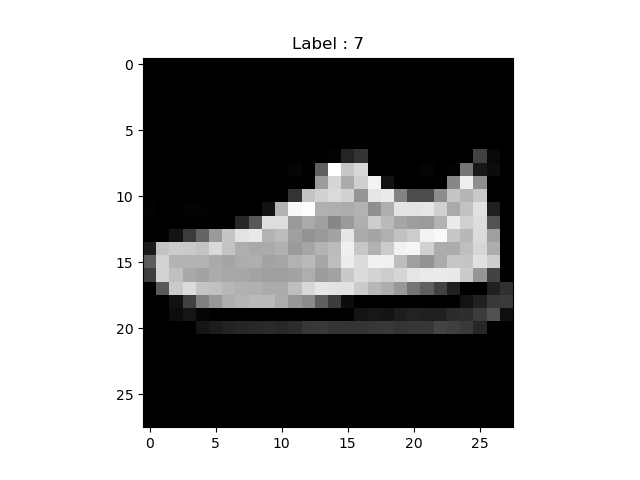

<class 'numpy.ndarray'> (28, 28)


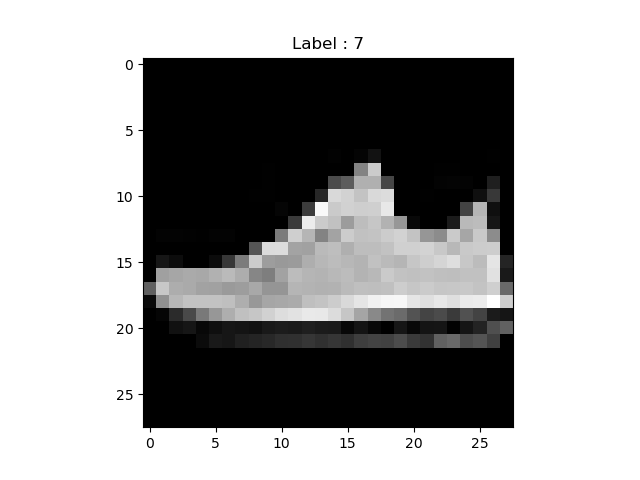

<class 'numpy.ndarray'> (28, 28)


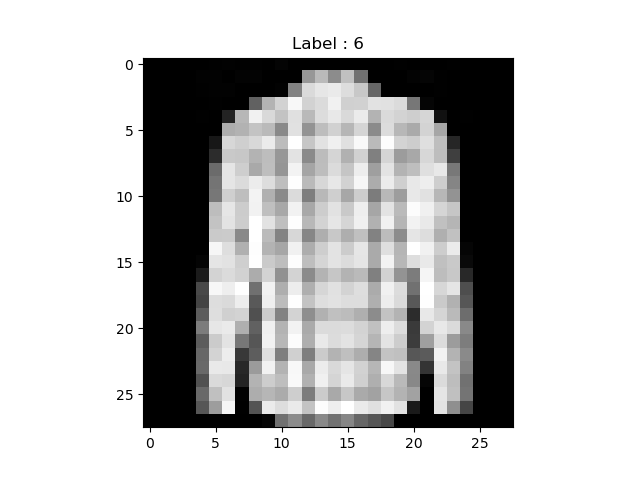

<class 'numpy.ndarray'> (28, 28)


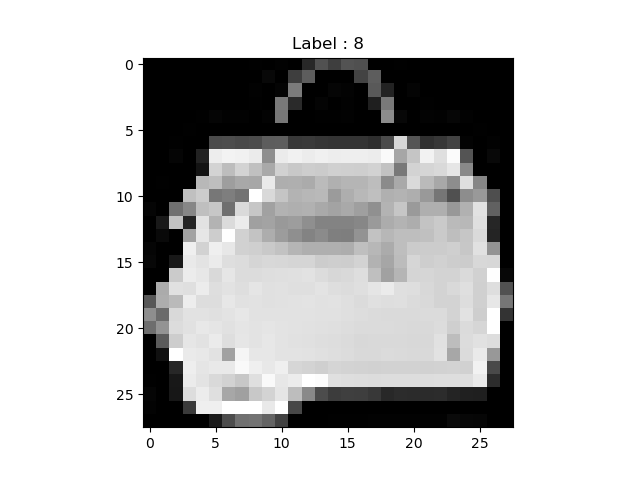

<class 'numpy.ndarray'> (28, 28)


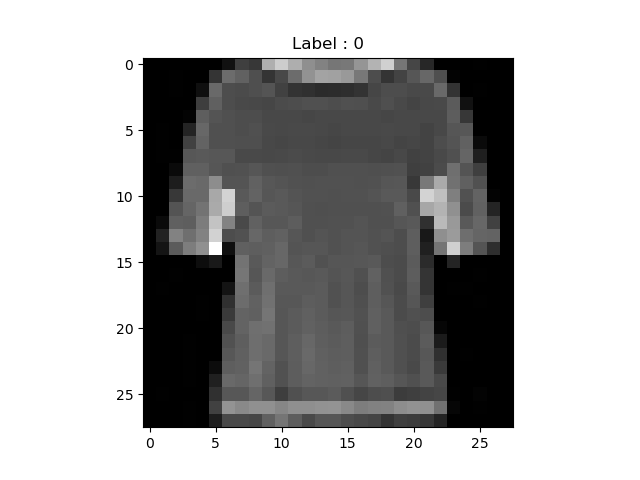

<class 'numpy.ndarray'> (28, 28)


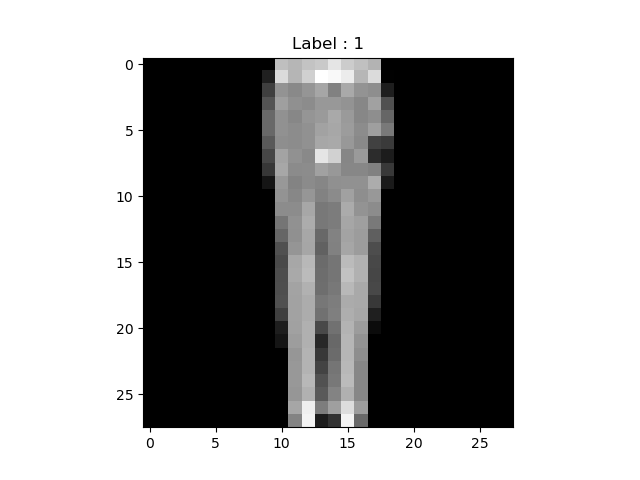

<class 'numpy.ndarray'> (28, 28)


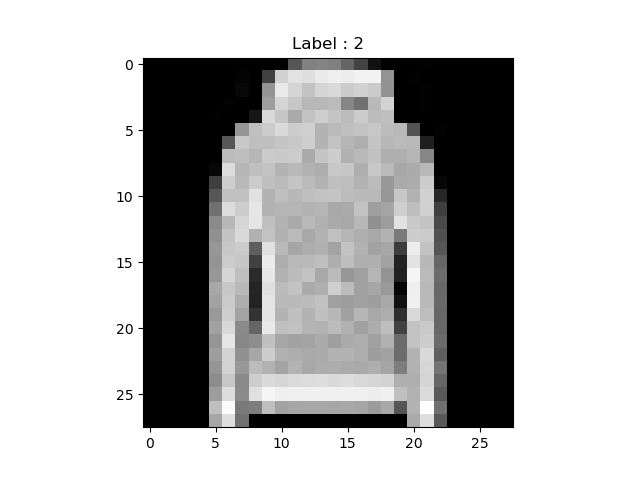

<class 'numpy.ndarray'> (28, 28)


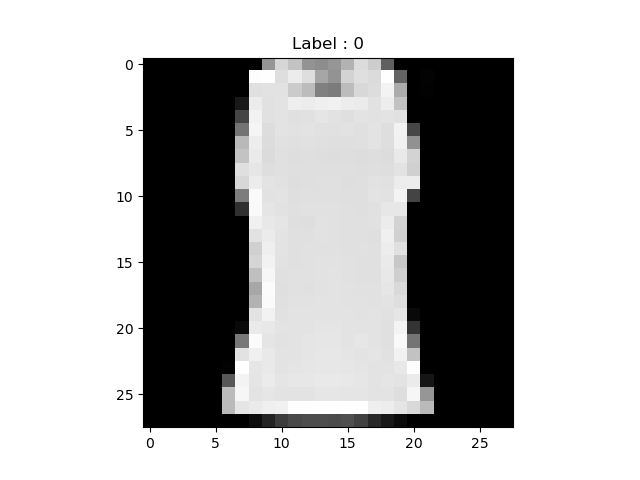

<class 'numpy.ndarray'> (28, 28)


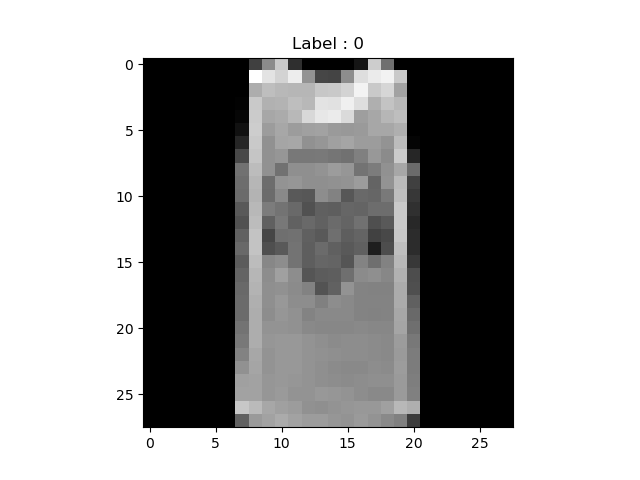

<class 'numpy.ndarray'> (28, 28)


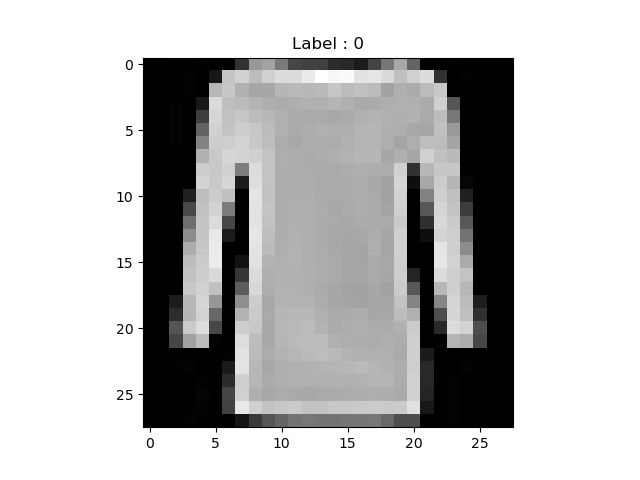

In [4]:
data_sample = fashion_train_data.sample(10) # Random Sample 

image_sample = np.array(data_sample.drop(columns=['label']))
label_sample = np.array( data_sample['label'] )
for i in range(0,len(image_sample)):
    image = image_sample[i].reshape((28,28))
    print(type(image),image.shape)
    plt.imshow(image,cmap='gray', vmin=0, vmax=255)
    plt.title( "Label : " + str(label_sample[i]) )
    plt.show()

In [5]:
for col in image_data.columns:
    minimum = np.min(image_data[col])
    maximum = np.max(image_data[col])
    image_data[col] =  ( image_data[col] - minimum )/( maximum - minimum )
    test_data_images[col] =  ( test_data_images[col] - minimum )/( maximum - minimum )

In [6]:
epsilon = 1e-10


def softmax(arrays):
    output = []
    for array in arrays:
        array = array - np.max(array)
        value = np.exp(array)/sum(np.exp(array))
        output.append(value)
    return np.array(output)

image_data['ones'] = np.ones(image_data.shape[0])
test_data_images['ones'] = np.ones(test_data_images.shape[0])
X = np.array(image_data)
y = np.array(labels)

unique_labels = labels.unique()

# Weights initialization
w0 = np.random.normal(loc=0.0, scale=0.001,size=(len(unique_labels),X.shape[1])) # (random number with normal distribution)
# w0 = np.ones((len(unique_labels),X.shape[1]))
# w0 = np.random.rand(len(unique_labels),X.shape[1])

y_one_hot = np.zeros((y.size, y.max() + 1))
y_one_hot[np.arange(y.size), y] = 1

X.shape, y.shape, y_one_hot.shape, w0.shape

C:\Users\najka\AppData\Local\Temp\ipykernel_24132\545716925.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  image_data['ones'] = np.ones(image_data.shape[0])
C:\Users\najka\AppData\Local\Temp\ipykernel_24132\545716925.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_images['ones'] = np.ones(test_data_images.shape[0])


((10000, 785), (10000,), (10000, 10), (10, 785))

In [8]:
epsilon = 1e-8
    
def Cross_Entropy_Fun(w, X, y_one_hot, Lambda=0.05):
    m = X.shape[0] # no of instances
    h = softmax(np.dot(X,w.T))
    J = (-1/m)*np.sum(np.multiply( y_one_hot, np.log(h+epsilon))) # + (Lambda/(2*m))*np.sum(np.square(w[:-1]))
   # print(X.shape, h.shape, w.shape, y.shape, y_one_hot.shape, np.multiply( y_one_hot, np.log(h+epsilon)).shape )
    return J
# print( "Trial Run Cost Function:  ", Categorical_Cross_Entropy_Function(w0, X, y_one_hot))

def Gradient_fun(w, X, y_one_hot, Lambda=0.05):
    m = X.shape[0] # no of instances
    h = softmax(np.dot(X,w.T))
    grad = np.dot( (-1/m)*(np.divide(y_one_hot,h+epsilon)).T, X)
    return np.array(grad)
    
gradient = Gradient_fun(w0, X, y_one_hot)
# gradient.shape      

# def check_value(array):
#     check = sum(sum(np.isnan((array))))
#     check = check + sum(sum(np.isinf((array))))
#     check = check + sum(sum(np.isneginf((array))))
#     return check

# check_value(gradient)
      
no_of_iterations = 3000
cost_history = [] 
iterations = []
weights_history = []

learning_rate = 0.001
w = w0.copy()

for i in range(0,no_of_iterations):
    iterations.append(i)
    cost_history.append(Cross_Entropy_Fun(w, X, y_one_hot))
    weights_history.append(w)
    gradient = Gradient_fun(w, X, y_one_hot)
#     if ( check_value(gradient) != 0 ):
#         print("Break!! at interation: ", i)
#         break
#     else:
    w = w - learning_rate*gradient

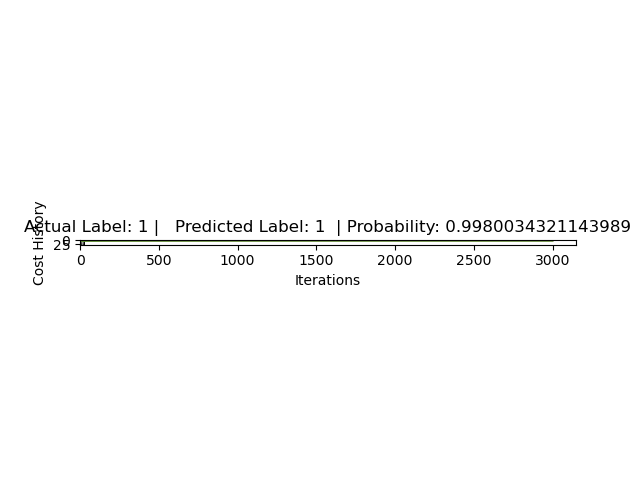

In [24]:
min_cost_index = len(cost_history)
plt.plot(cost_history[:])
plt.ylabel("Cost History")
plt.xlabel("Iterations")
plt.show()

In [18]:
optimized_weights = weights_history[np.argmin(cost_history)]
print( "Cost Function after Optimization:  ", Cross_Entropy_Fun(optimized_weights, X, y_one_hot))

Cost Function after Optimization:   0.7425979064673117


In [19]:
def predict(w,x):
    pred=[]
    probability = []
    h = softmax(np.dot(x,w.T))
    for output_array in h:
        pred.append( np.argmax(output_array) )
        probability.append(output_array[np.argmax(output_array)])
    return np.array(pred), probability

predictions, probability = predict(optimized_weights,X)
np.unique(predictions), predictions.shape

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), (10000,))

In [20]:
y, predictions

(array([0, 1, 2, ..., 8, 8, 1], dtype=int64),
 array([0, 1, 2, ..., 8, 8, 6], dtype=int64))

In [21]:
y = y.reshape(len(y))
print( "Train Set | Accuracy: ", np.sum(predictions==y)/len(y) * 100, "%")

Train Set | Accuracy:  71.06 %


In [22]:
fashion_test_data_label = np.array(fashion_test_data_label).reshape(len(fashion_test_data_label),)
fashion_test_data_images = np.array(test_data_images)
predictions, probability = predict(optimized_weights,fashion_test_data_images)
print( "Test Set | Accuracy: ", np.sum(predictions==fashion_test_data_label)/len(fashion_test_data_label) * 100, "%")

Test Set | Accuracy:  66.66666666666666 %


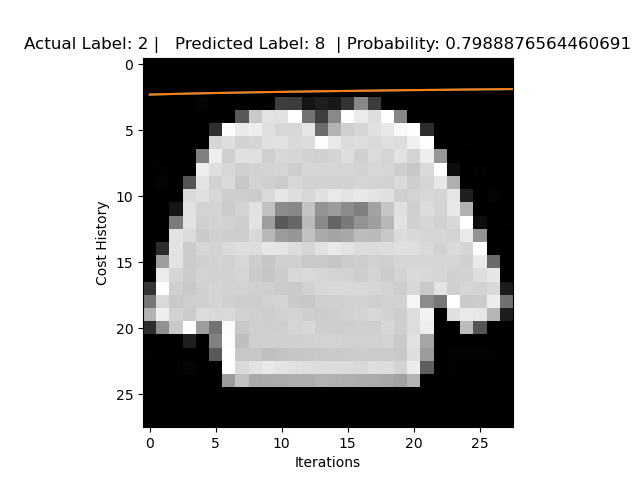

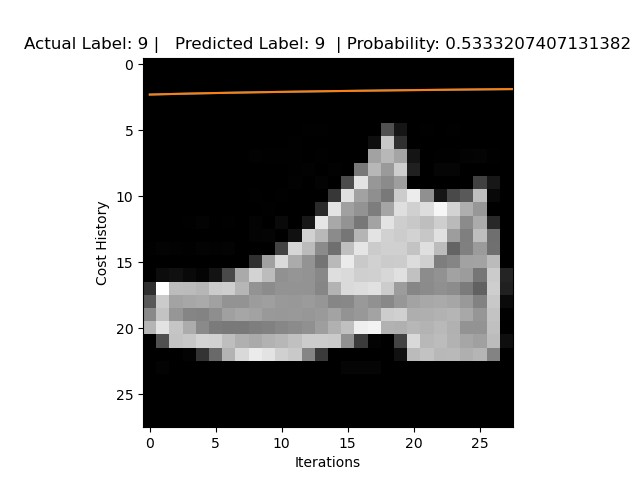

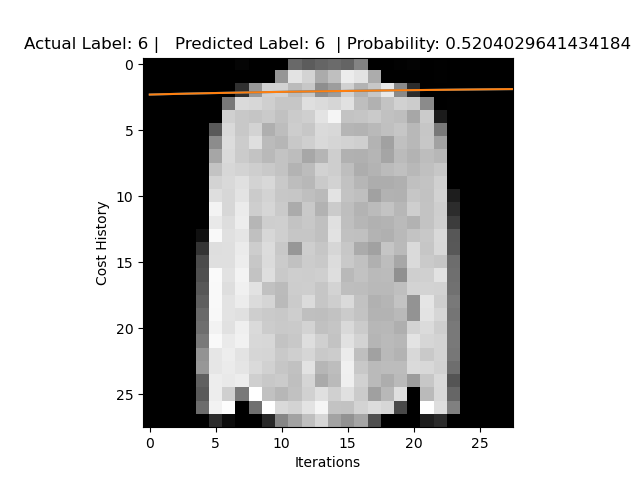

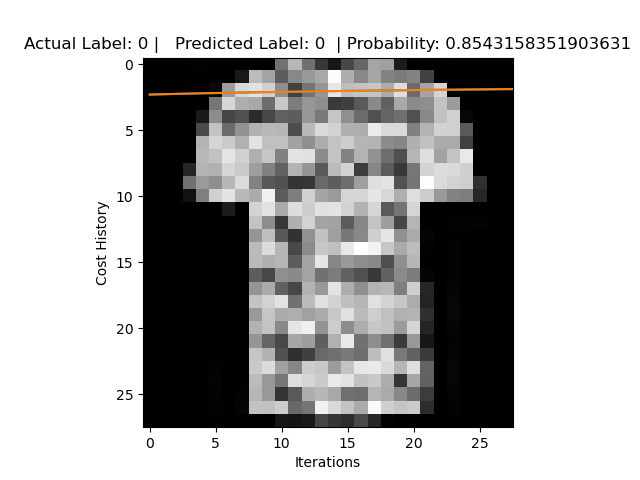

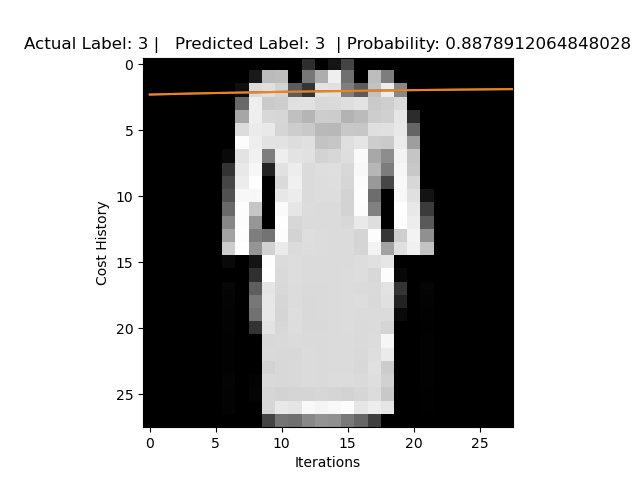

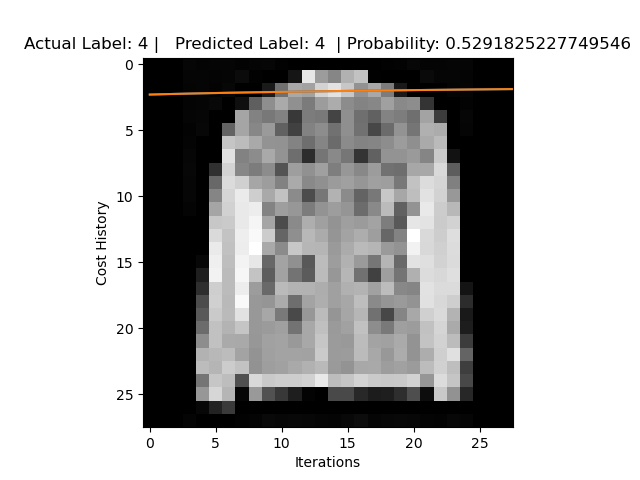

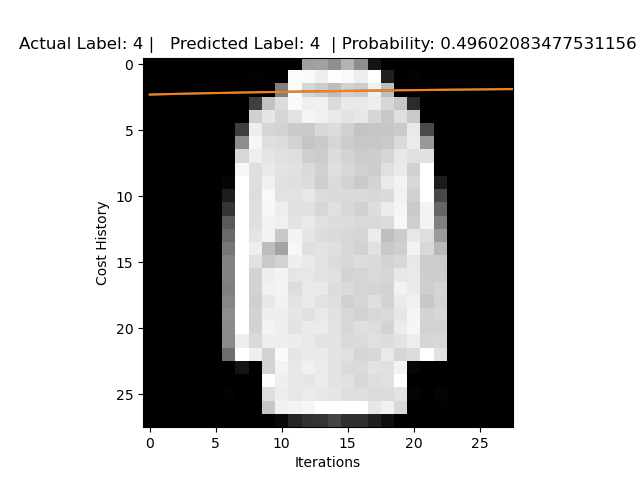

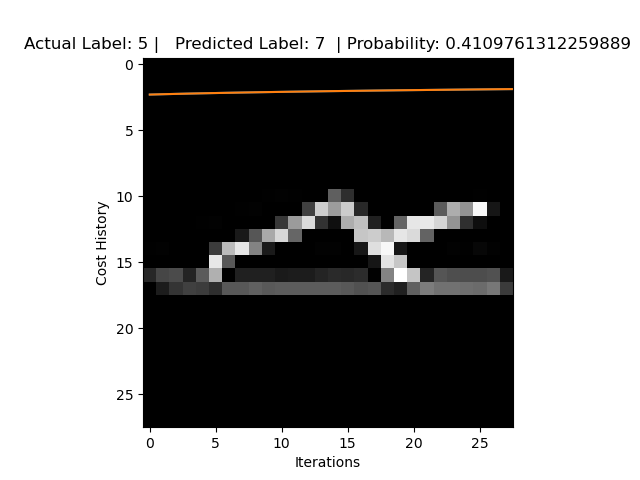

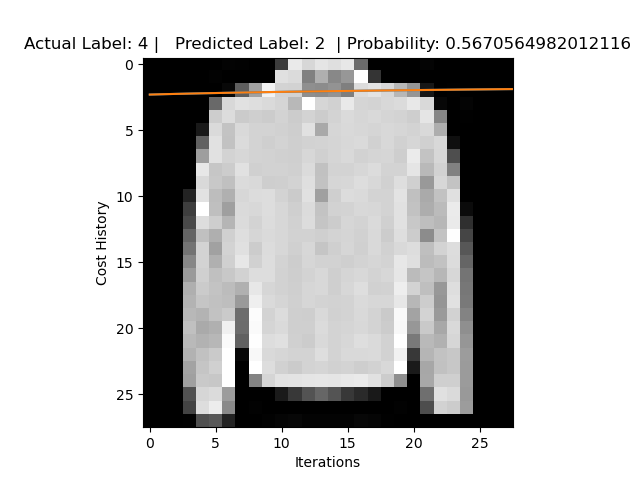

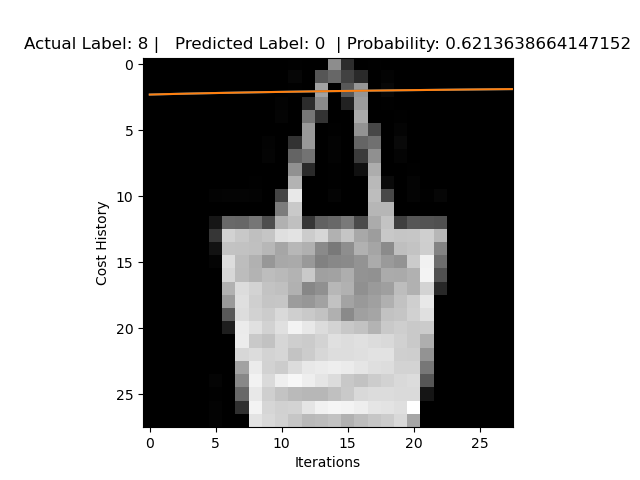

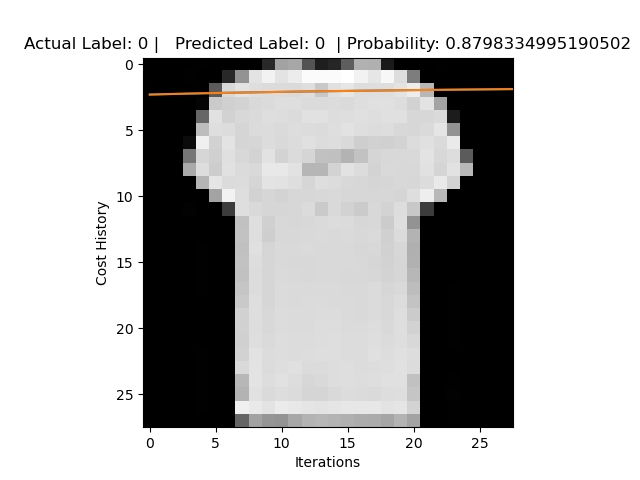

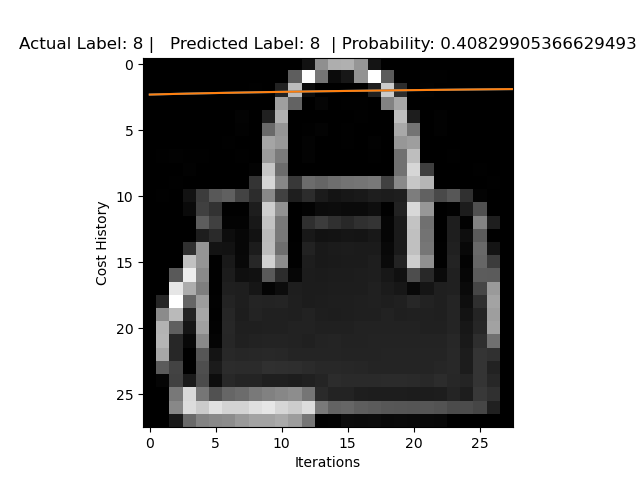

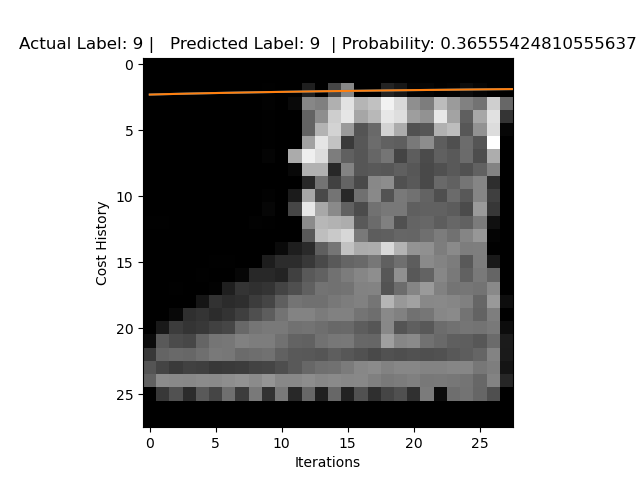

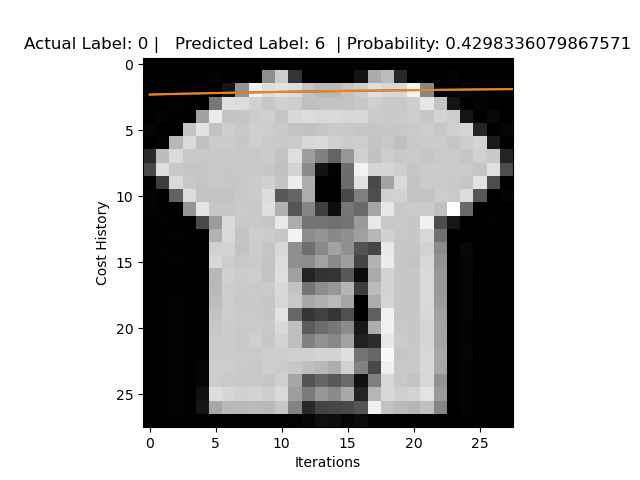

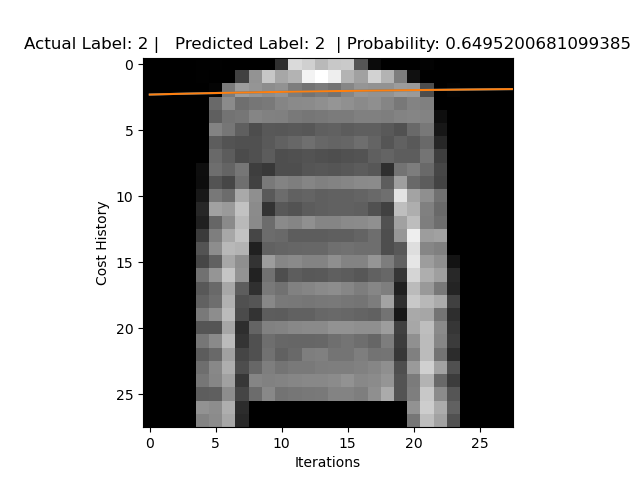

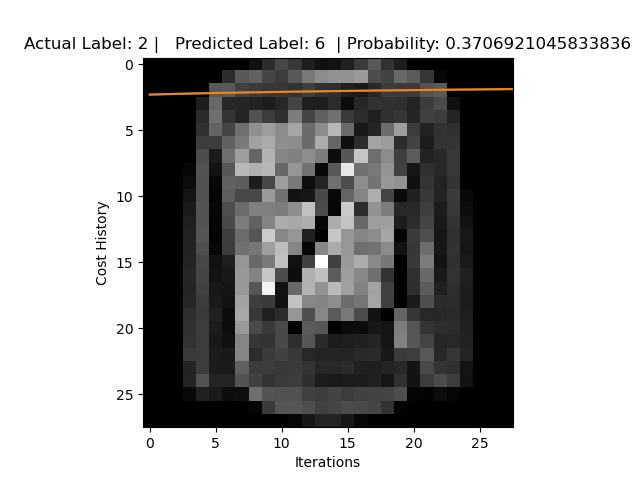

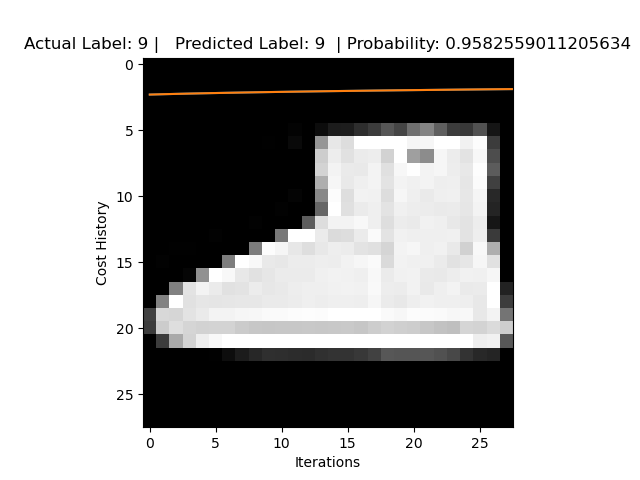

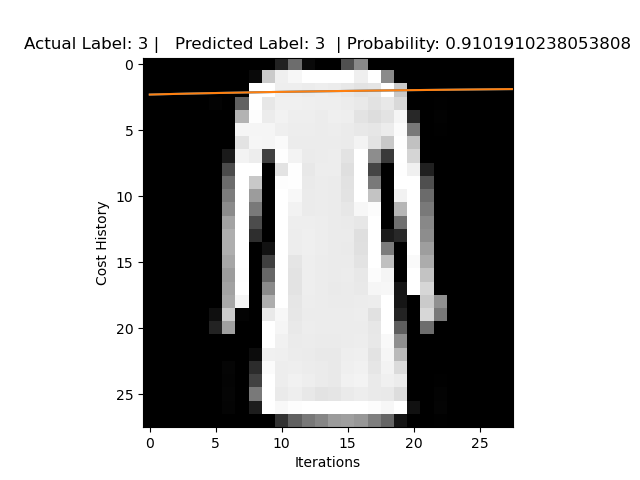

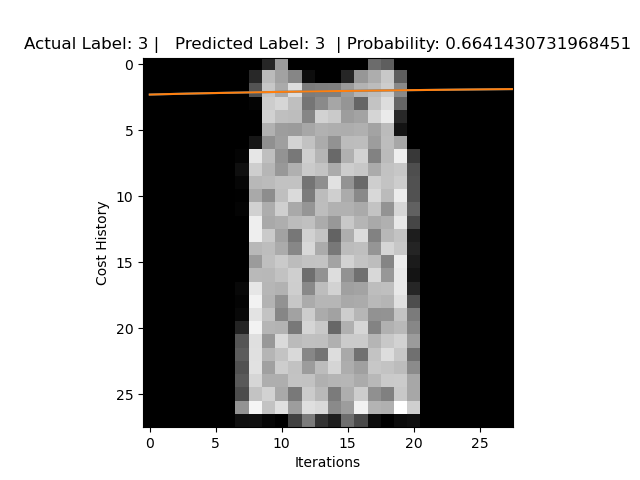

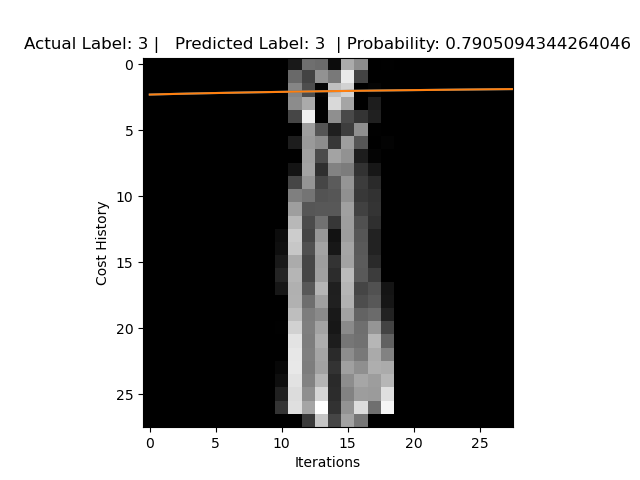

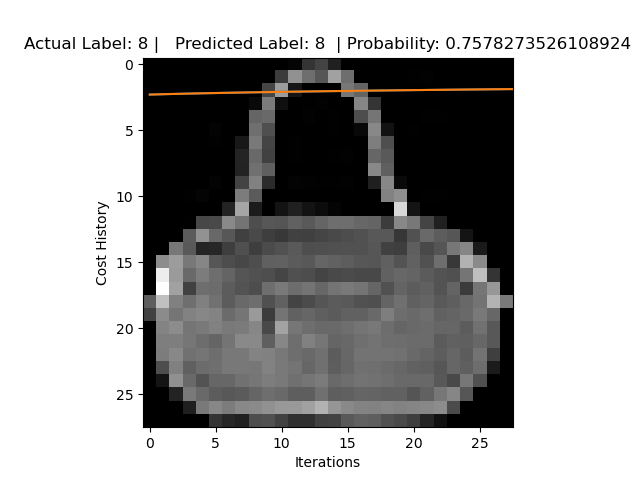

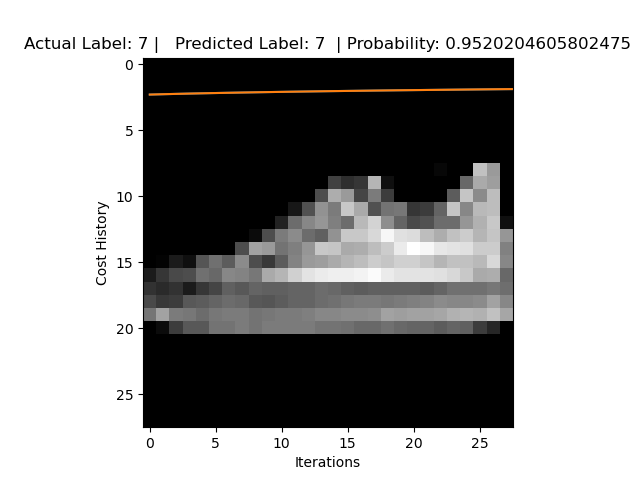

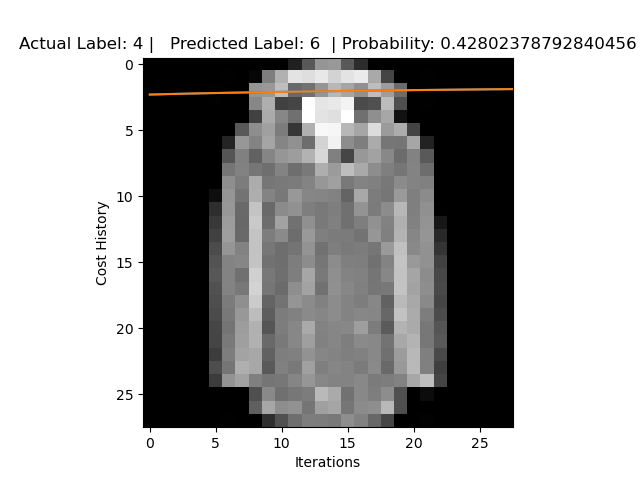

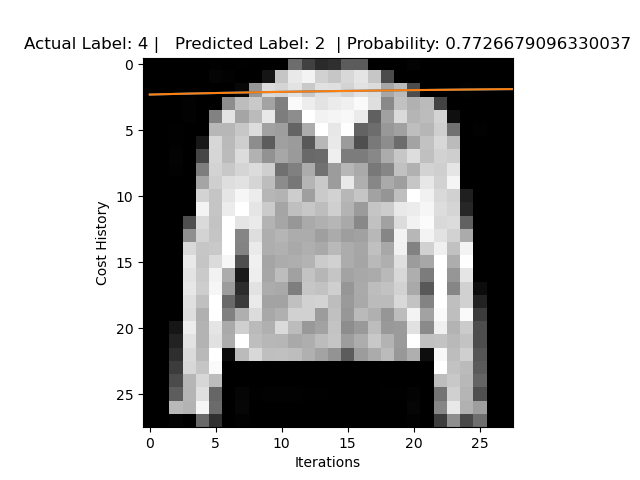

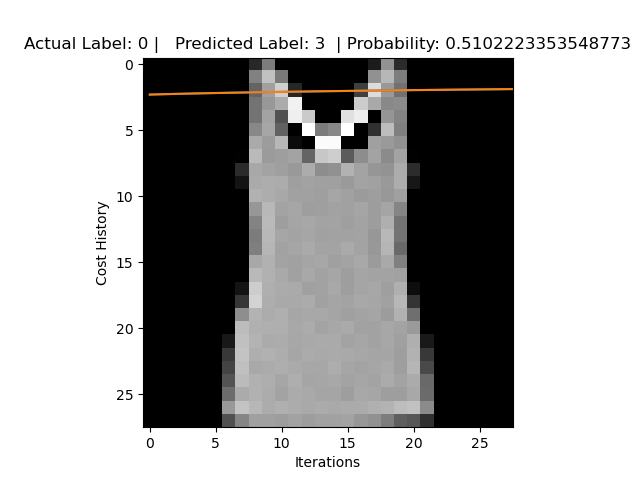

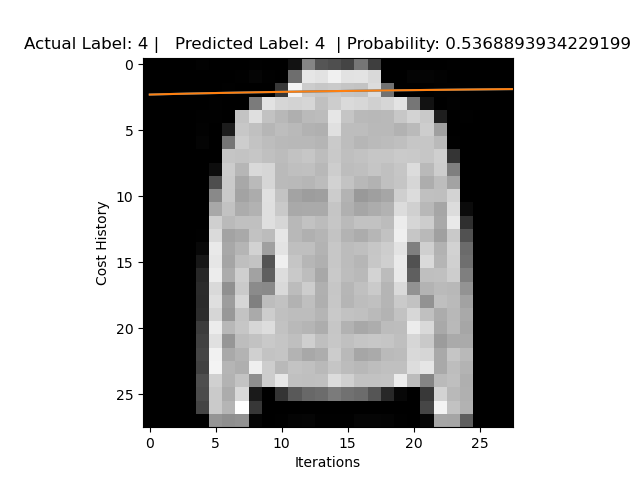

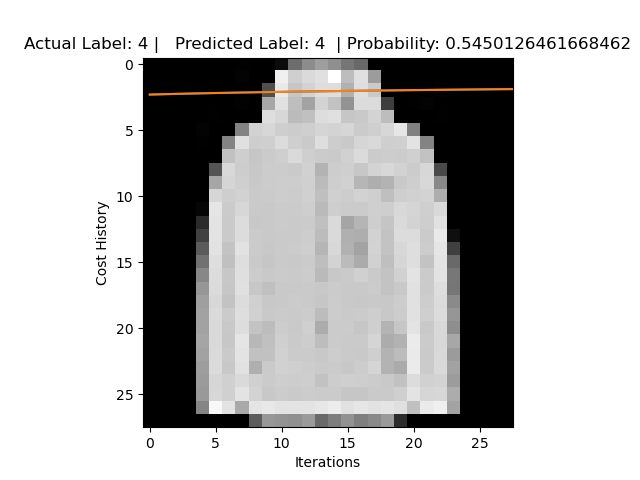

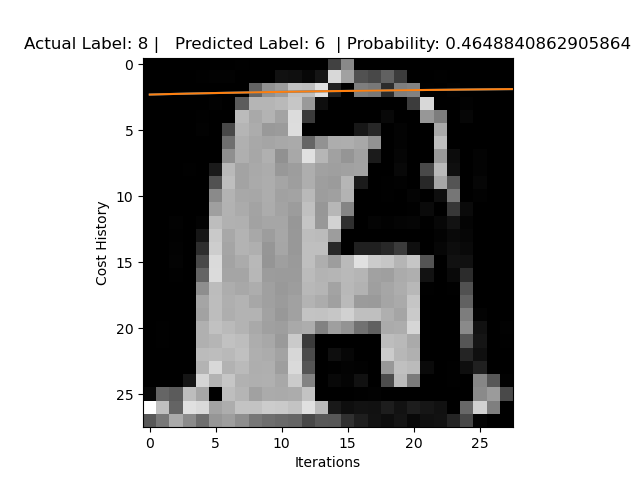

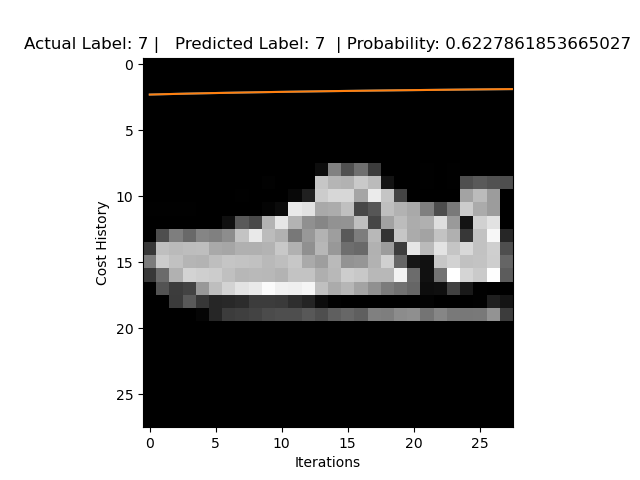

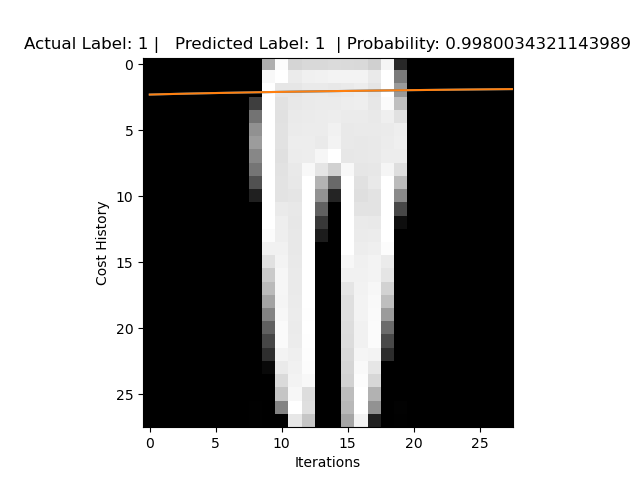

In [23]:
for i in range(0,len(fashion_test_data_images)):
    plt.imshow(fashion_test_data_images[i][:-1].reshape(28,28),cmap='gray')
    plt.title( "Actual Label: " + str(fashion_test_data_label[i]) + " |   Predicted Label: " + str(predictions[i]) + "  | Probability: " + str(probability[i]) )
    plt.show()